In [114]:
import numpy as np
import pandas as pd

In [115]:
dataset = pd.read_csv('/users/he145100/OneDrive - WA Health/Test Data/vw_emergency_episode_1mil_less_fields.csv')

In [116]:
list(dataset.columns)

['triage_category',
 'primary_diagnosis',
 'presenting_complaint',
 'statistical_area_2_2016',
 'primary_diagnosis_ICD10AM_chapter',
 'principal_diagnosis_system_code_EDIS',
 'australian_postcode',
 'attendance_length_of_episode',
 'attendance',
 'attendance_with_length_of_episode_less_than_or_equal_to_4_hours',
 'attendance_with_length_of_episode_less_than_or_equal_to_4_hours_denominator',
 'mental_health_attendance',
 'admission',
 'seen_within_recommended_time',
 'seen_within_recommended_time_denominator',
 'winter_related_illness_attendance',
 'potentially_avoidable_general_practitioner_type_attendance',
 'potentially_avoidable_general_practitioner_type_attendance_denominator']

In [117]:
dataset.shape

(999999, 18)

In [118]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (949999, 18)
Unseen Data For Predictions: (50000, 18)


In [133]:
#filed total number of admissions to see if dataset is imbalanced for training
sum(dataset['admission'] == 1)

282207

In [119]:
from pycaret.classification import *

In [120]:
#Ordinal Encoding
#When the categorical features in the dataset contain variables with intrinsic natural order such as Low, Medium, and High, 
#these must be encoded differently than nominal variables (where there is no intrinsic order for e.g. Male or Female). 
#This can be achieved using  the ordinal_features parameter in the setup function that accepts a dictionary with feature 
#names and the levels in the increasing order from lowest to highest.

#triage rating needs to setup as ordinal 
#ordinal_features = {'triage_category' : ['7','5','4','3','2','1']},
admission_test_1 = setup(data = data, target = 'admission',
                         normalize = True,
                         #ignore_features=[
                         #                'attendance_length_of_episode',
                         #                   'mental_health_admission'],
                         ordinal_features = {'triage_category' : ['7','5','4','3','2','1']},
                         high_cardinality_features = ['presenting_complaint','australian_postcode',
                                                      'primary_diagnosis','primary_diagnosis_ICD10AM_chapter',
                                                      'principal_diagnosis_system_code_EDIS'], 
                         session_id=123) 

,Description,Value
0,session_id,123
1,Target,admission
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(949999, 18)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,14
8,Ordinal Features,True
9,High Cardinality Features,True


In [121]:
best_model = compare_models(exclude = ['knn', 'qda'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8250,0.8912,0.6175,0.7223,0.6658,0.5483,0.5513,28.2930
xgboost,Extreme Gradient Boosting,0.8201,0.8867,0.6060,0.7136,0.6554,0.5348,0.5381,14.2690
lightgbm,Light Gradient Boosting Machine,0.8094,0.8743,0.5676,0.7006,0.6271,0.5010,0.5060,1.2930
rf,Random Forest Classifier,0.8052,0.8670,0.5845,0.6805,0.6288,0.4978,0.5005,14.2990
et,Extra Trees Classifier,0.7988,0.8548,0.5798,0.6646,0.6193,0.4834,0.4855,12.7220
gbc,Gradient Boosting Classifier,0.7858,0.8446,0.4859,0.6653,0.5616,0.4244,0.4336,19.1890
ada,Ada Boost Classifier,0.7718,0.8285,0.4422,0.6384,0.5225,0.3790,0.3900,5.3970
lr,Logistic Regression,0.7623,0.8034,0.3937,0.6256,0.4832,0.3391,0.3545,2.1590
svm,SVM - Linear Kernel,0.7610,0.0000,0.3032,0.6748,0.4130,0.2912,0.3296,0.2630
lda,Linear Discriminant Analysis,0.7571,0.7962,0.4128,0.6018,0.4897,0.3375,0.3478,0.3950


In [122]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8265,0.8934,0.6199,0.7255,0.6686,0.5520,0.5551
1,0.8252,0.8909,0.6194,0.7221,0.6668,0.5493,0.5523
2,0.8262,0.8928,0.6190,0.7251,0.6679,0.5511,0.5543
3,0.8268,0.8915,0.6229,0.7249,0.6700,0.5535,0.5564
4,0.8250,0.8903,0.6160,0.7231,0.6653,0.5478,0.5510
5,0.8240,0.8908,0.6169,0.7196,0.6643,0.5460,0.5490
6,0.8251,0.8927,0.6197,0.7214,0.6667,0.5490,0.5519
7,0.8226,0.8896,0.6087,0.7196,0.6595,0.5406,0.5441
8,0.8256,0.8905,0.6182,0.7238,0.6669,0.5498,0.5529


In [123]:
print(catboost)

In [124]:
tuned_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8217,0.8884,0.6115,0.7157,0.6595,0.5398,0.5428
1,0.8209,0.8860,0.6081,0.7151,0.6573,0.5372,0.5404
2,0.8235,0.8885,0.6099,0.7219,0.6611,0.5430,0.5465
3,0.8215,0.8866,0.6096,0.7159,0.6585,0.5387,0.5419
4,0.8207,0.8855,0.6018,0.7175,0.6546,0.5348,0.5385
5,0.8189,0.8861,0.6049,0.7104,0.6535,0.5319,0.5350
6,0.8215,0.8878,0.6113,0.7151,0.6591,0.5393,0.5423
7,0.8188,0.8846,0.5994,0.7131,0.6513,0.5302,0.5338
8,0.8202,0.8858,0.6040,0.7149,0.6548,0.5344,0.5379


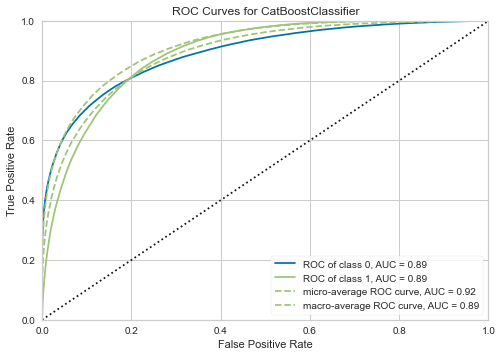

In [125]:
plot_model(catboost, plot = 'auc')

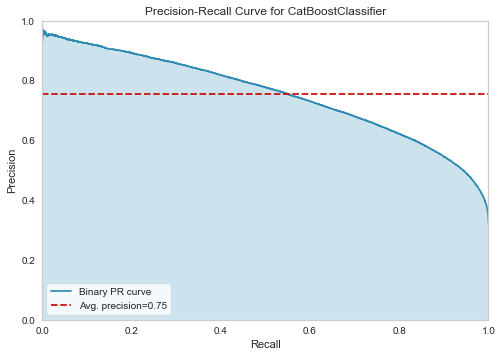

In [126]:
plot_model(catboost, plot = 'pr')

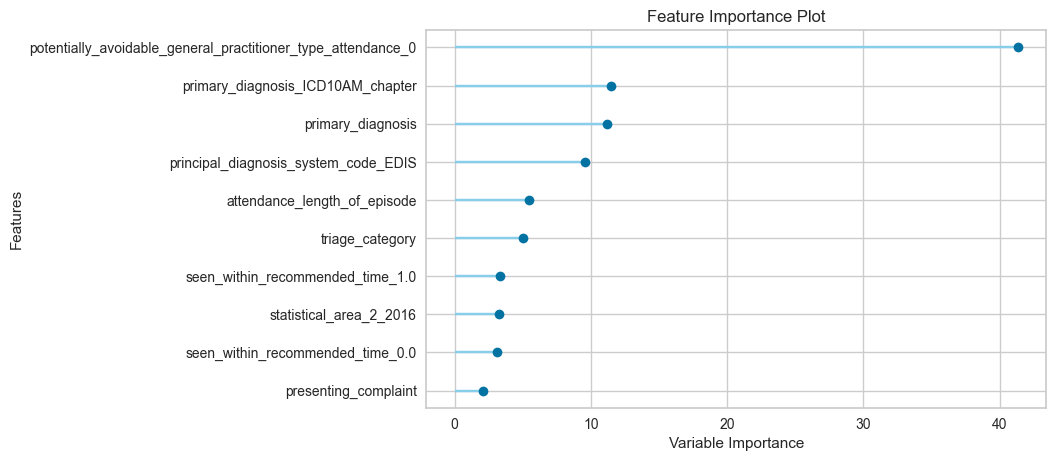

In [127]:
plot_model(catboost, plot='feature')

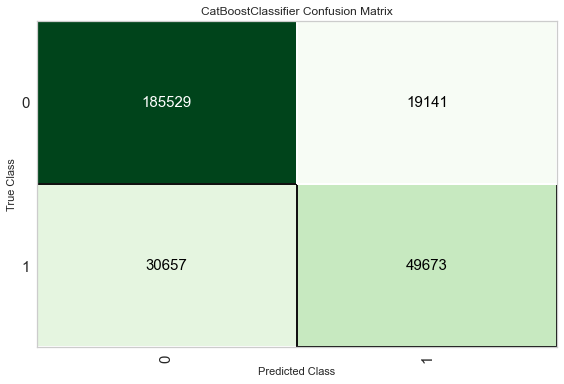

In [128]:
plot_model(catboost, plot = 'confusion_matrix')
#https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
#True Positive:
#Interpretation: You predicted positive and it’s true.
#You predicted that a woman is pregnant and she actually is.
#True Negative:
#Interpretation: You predicted negative and it’s true.
#You predicted that a man is not pregnant and he actually is not.
#False Positive: (Type 1 Error)
#Interpretation: You predicted positive and it’s false.
#You predicted that a man is pregnant but he actually is not.
#False Negative: (Type 2 Error)
#Interpretation: You predicted negative and it’s false.
#You predicted that a woman is not pregnant but she actually is.

In [129]:
evaluate_model(catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [130]:
predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8253,0.8921,0.6184,0.7218,0.6661,0.5487,0.5517


,triage_category,primary_diagnosis,presenting_complaint,statistical_area_2_2016,primary_diagnosis_ICD10AM_chapter,principal_diagnosis_system_code_EDIS,australian_postcode,attendance_length_of_episode,attendance_with_length_of_episode_less_than_or_equal_to_4_hours_0,mental_health_attendance_0,seen_within_recommended_time_0.0,seen_within_recommended_time_1.0,winter_related_illness_attendance_1,potentially_avoidable_general_practitioner_type_attendance_0,admission,Label,Score
0,3.0,-0.627841,-0.839657,-0.054247,-1.247615,-0.507047,-1.034719,0.773046,1.0,1.0,0.0,1.0,0.0,1.0,1,1,0.8465
1,2.0,2.942818,-0.281855,0.020987,-0.877752,3.431033,0.087553,-0.396711,0.0,1.0,0.0,0.0,0.0,1.0,0,0,1.0000
2,2.0,-0.506825,-0.855311,0.005700,1.380138,-0.436154,0.058424,0.188167,1.0,1.0,1.0,0.0,0.0,1.0,0,0,0.6839
3,3.0,-0.344275,0.017281,0.005700,-0.961024,-0.194302,0.399057,0.029479,1.0,1.0,1.0,0.0,0.0,1.0,1,0,0.5327
4,2.0,-0.404103,-0.866765,0.021437,1.380138,-0.287416,-0.802361,-0.503259,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284995,2.0,-0.643787,-0.659832,0.035975,1.380138,-0.524634,-0.691715,-0.240290,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0.9999
284996,3.0,-0.642551,-0.864283,0.035524,-1.226785,-0.523270,0.708754,-0.251625,0.0,1.0,1.0,0.0,0.0,1.0,0,0,0.9676
284997,3.0,0.248939,-0.690948,0.005850,-0.907183,-0.056607,1.116227,0.117891,1.0,1.0,1.0,0.0,0.0,1.0,1,0,0.6065
284998,2.0,-0.477405,-0.670522,0.020537,1.380138,-0.575622,1.960189,-0.303765,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0.9746


In [131]:
final_catboost = finalize_model(catboost)

In [134]:
#Final catboost parameters for deployment
print(final_catboost)

In [135]:
unseen_predictions = predict_model(final_catboost, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8273,0.8946,0.6230,0.7270,0.6710,0.5549,0.5580


,triage_category,primary_diagnosis,presenting_complaint,statistical_area_2_2016,primary_diagnosis_ICD10AM_chapter,principal_diagnosis_system_code_EDIS,australian_postcode,attendance_length_of_episode,attendance,attendance_with_length_of_episode_less_than_or_equal_to_4_hours,attendance_with_length_of_episode_less_than_or_equal_to_4_hours_denominator,mental_health_attendance,admission,seen_within_recommended_time,seen_within_recommended_time_denominator,winter_related_illness_attendance,potentially_avoidable_general_practitioner_type_attendance,potentially_avoidable_general_practitioner_type_attendance_denominator,Label,Score
0,2,NaN,CC000,505011080,Missing,NaN,6027,NaN,0,0,0,0,0,NaN,0,0,0,0,0,0.9993
1,3,NaN,QAB00,503021041,Missing,NaN,6005,NaN,0,0,0,0,0,NaN,0,0,0,0,0,0.9995
2,4,M25.53,JUQ00,502011028,(M00-M99) Diseases of the musculoskeletal syst...,D01766,6210,89.0,1,1,1,0,0,1.0,1,0,0,1,0,0.9239
3,3,J05.0,C0000,505021097,(J00-J99) Diseases of respiratory system,D01208,6060,NaN,0,0,0,0,0,NaN,0,0,0,0,0,0.9595
4,3,NaN,C0000,505011083,Missing,NaN,6026,147.0,1,1,1,0,0,NaN,0,0,0,0,0,0.9998


In [136]:
unseen_predictions[["admission","Label"]].head(50)

,admission,Label
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [137]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['admission'], unseen_predictions['Label'], metric = 'Accuracy')

0.8273

In [138]:
save_model(final_catboost, 'catboost_admission_05_07_2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='admission',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                 ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='admission')),
                 ('fix_perfect', Remove_100(target='admission')),
                 ('clean_names', Clean_Colum_Names()),
              

In [139]:
new_dataset = pd.read_csv('/users/he145100/OneDrive - WA Health/Test Data/emergency_arrivals_powerbi_test_10k.csv', dtype={
                                                                               'standard_australian_classification_of_countries_2011_for_country_of_birth':'str',
  'ambulance_number':'str'})

In [140]:
from pycaret.classification import load_model
saved_catboost = load_model('/Users/he145100/catboost_admission_05_07_2022')
print(saved_catboost)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='admission',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='admission')),
                ('fix_perfect', Remove_100(target='admission')),
                ('clean_names',

In [141]:
from pycaret.classification import *
new_prediction = predict_model(saved_catboost, data=new_dataset)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8482,0.9070,0.6578,0.7087,0.6823,0.5828,0.5835


In [142]:
new_prediction.head()

,sequence_number,establishment_code,sex,ethnicity,marital_status,interpreter_required,employment_status,occupation,triage_category,visit_type,...,affected_by_drugs_only,affected_by_drugs_and_or_alcohol,likely_meth_related_attendance,self_harm_attendance,suicide_attempt_or_at_risk_of_suicide,mental_health_consult,age,emergency_department_information_system_covid19_flag,Label,Score
0,1101239629,105,1,4,5,2,7.0,NaN,2,1,...,0,0,0,0,0,NaN,64,0,0,0.9978
1,1101239628,208,2,4,1,2,7.0,NaN,2,1,...,0,0,0,0,0,NaN,57,0,0,0.9998
2,1101239627,101,1,4,5,2,3.0,NaN,2,1,...,0,0,0,0,0,NaN,41,0,0,0.9995
3,1101239626,642,2,4,1,2,8.0,NaN,4,1,...,0,0,0,0,0,NaN,18,0,0,0.9999
4,1101239625,277,2,4,1,2,1.0,NaN,3,1,...,0,0,0,0,0,NaN,2,0,0,0.9812


In [143]:
from pycaret.utils import check_metric
check_metric(new_prediction['admission'], new_prediction['Label'], metric = 'Accuracy')

0.8482